# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward **non-technical** executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a **state of your choice**.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:

sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')  

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

**sat_2017**

Contains 'States', 'Pariticpation, 'Evidence-Based Reading and Writing' and 'Math'. Also in the data is a 'Total' column that is a summation of both the 'Evidence-Based Reading and Writing' and 'Math' columns.

States with a lower participation rate tend to score higher on Total




**act_2017**

'States', 'Pariticpation, 'English', 'Math', 'Reading', 'Science' and a 'Composite' which is the aggregate of the 4 scores


#### 4a. Does the data look complete? 

Answer: 51 rows in sat_2017 vs 52 in act_2017. A 'National' agreggate is missing from sat_2017.

In [5]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**

**- [SAT scores are on a range of 200-800 for each subject with a total of 400-1600](https://blog.prepscholar.com/sat-score-range)**

**- [ACT scores are on a range of 1-32 for all subjects and composite scores](https://blog.prepscholar.com/what-is-a-good-act-score-a-bad-act-score-an-excellent-act-score)**

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

**A new column in sat_2017 is created, labelled 'Check_sum' which is 'EBRW' + 'Math'**

In [7]:
sat_2017['Check_sum'] = sat_2017['Evidence-Based Reading and Writing'] + sat_2017['Math']
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Check_sum
0,Alabama,5%,593,572,1165,1165
1,Alaska,38%,547,533,1080,1080
2,Arizona,30%,563,553,1116,1116
3,Arkansas,3%,614,594,1208,1208
4,California,53%,531,524,1055,1055
5,Colorado,11%,606,595,1201,1201
6,Connecticut,100%,530,512,1041,1042
7,Delaware,100%,503,492,996,995
8,District of Columbia,100%,482,468,950,950
9,Florida,83%,520,497,1017,1017


In [8]:
sat_2017[sat_2017['Total'] != sat_2017['Check_sum']]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Check_sum
6,Connecticut,100%,530,512,1041,1042
7,Delaware,100%,503,492,996,995
12,Idaho,93%,513,493,1005,1006
15,Iowa,2%,641,635,1275,1276
18,Louisiana,4%,611,586,1198,1197
20,Maryland,69%,536,52,1060,588
21,Massachusetts,76%,555,551,1107,1106
22,Michigan,100%,509,495,1005,1004
24,Mississippi,2%,634,607,1242,1241
27,Nebraska,3%,629,625,1253,1254


**- Most likely the descrepancies are due to rounding errors, with the exception of Maryland.**

**- Maryland has a 'EBRW' of 536, 'Math' of 56 but a Total of 1060.**

**- 'Math' columns was input as a mistake 1060-536=524**

In [9]:
sat_2017.loc[20,'Math'] = 524

In [10]:
sat_2017.loc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Check_sum                                  588
Name: 20, dtype: object

**We wil also check the max and min scores for each dataframe**

In [11]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total,Check_sum
count,51.000000,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039,1116.745098
std,45.666901,47.121395,92.494812,119.030894
min,482.000000,468.000000,950.000000,588.000000
25%,533.500000,523.500000,1055.500000,1053.500000
50%,559.000000,548.000000,1107.000000,1106.000000
75%,613.000000,599.000000,1212.000000,1211.500000
max,644.000000,651.000000,1295.000000,1295.000000


**min and max sat_2017 scores are inline (200-800)**


source: https://blog.prepscholar.com/whats-the-highest-possible-sat-score


In [12]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


**min and max act_2017 scores are inline(1-36)**

source: https://blog.prepscholar.com/how-is-the-act-scored

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
Check_sum                             51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [14]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Composite in act_2017 should be float instead of object. Participation rates for both sat_2017 and act_2017 should be float as well.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
#code
def recode(column):
    return float(column.replace('%', ''))/100

In [16]:
sat_2017['Participation'] = sat_2017['Participation'].map(recode)

In [17]:
act_2017['Participation'] = act_2017['Participation'].map(recode)

In [18]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Check_sum
0,Alabama,0.05,593,572,1165,1165
1,Alaska,0.38,547,533,1080,1080
2,Arizona,0.30,563,553,1116,1116
3,Arkansas,0.03,614,594,1208,1208
4,California,0.53,531,524,1055,1055


In [19]:
act_2017.head(6)

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
#code
act_2017.loc[51]

State            Wyoming
Participation          1
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite          20.2x
Name: 51, dtype: object

**As composite is calculated up to only 1 decimal place, we will round down to 20.2. And then change from object to float.**

source: https://blog.prepscholar.com/how-is-the-act-scored

In [21]:
act_2017.loc[51, 'Composite'] = 20.2

In [22]:
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [23]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


**Now that 'composite' in act_2017 is a float, we can check if the data is a close to the average of English, Math, Reading, Science**

In [24]:
act_2017['Check_sum'] = act_2017[['English','Math','Reading','Science']].mean(axis=1)

In [25]:
act_2017[act_2017['Composite'] != act_2017['Check_sum']]

,State,Participation,English,Math,Reading,Science,Composite,Check_sum
0,National,0.60,20.3,20.7,21.4,21.0,21.0,20.850
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,19.100
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,19.700
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,19.575
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,19.275
5,California,0.31,22.5,22.7,23.1,22.2,22.8,22.625
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,20.625
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,25.075
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,23.975
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,24.075


- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
Check_sum                             51 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


**Remove the check_sum column**

In [27]:
sat_2017.drop(['Check_sum'], axis=1, inplace=True)

In [28]:
act_2017.drop(['Check_sum'], axis=1, inplace=True)

- Display the data types again to confirm they are correct.

In [29]:
#Code:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [30]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [31]:
#code
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [32]:
act_2017.rename({'State': 'state', 'Participation': 'participation_act17', 'English':'english_act17',
                 'Math':'math_act17', 'Reading':'reading_act17', 'Science':'science_act17',
                 'Composite': 'composite_act17'}, axis=1, inplace=True)

In [33]:
act_2017.columns

Index(['state', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17'],
      dtype='object')

In [34]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [35]:
sat_2017.rename({'State':'state', 'Participation':'participation_sat17', 'Evidence-Based Reading and Writing':'reading_writing_sat17',
                         'Math':'math_sat17','Total': 'total_sat17'}, axis=1, inplace=True)

In [36]:
sat_2017.columns

Index(['state', 'participation_sat17', 'reading_writing_sat17', 'math_sat17',
       'total_sat17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 
|---|---|---|---|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [37]:
#'National' in act_2017 is the extra row.
act_2017.drop([0],axis=0, inplace=True)

In [38]:
act_2017.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [39]:
sat_2017.head()

,state,participation_sat17,reading_writing_sat17,math_sat17,total_sat17
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [40]:
#Code:
combined_2017 = pd.merge(sat_2017, act_2017, on='state', how='outer')

In [41]:
combined_2017.head()

,state,participation_sat17,reading_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [42]:
#code
combined_2017.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

**Importing in sat_2018 and act_2018_updated**

In [43]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')

In [44]:
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

**Change column labels**
- sat_2018 columns to match sat_2017
- act_2018 columns to match sat_2017

In [45]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [46]:
sat_2018.rename({'State':'state', 'Participation':'participation_sat18', 
                 'Evidence-Based Reading and Writing':'reading_writing_sat18',
                 'Math':'math_sat18','Total': 'total_sat18'}, axis=1, inplace=True)

In [47]:
sat_2018.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [48]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [49]:
act_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [50]:
act_2018.rename({'State':'state', 'Percentage of Students Tested': 'participation_act18',
                 'Average Composite Score':'composite_act18',
                 'Average English Score':'english_act18', 'Average Math Score':'math_act18', 
                 'Average Reading Score':'reading_act18','Average Science Score':'science_act18'}, axis=1, inplace=True)

In [51]:
act_2018.head()

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


**Check data integrity and  missing data**

In [52]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                    51 non-null object
participation_sat18      51 non-null object
reading_writing_sat18    51 non-null int64
math_sat18               51 non-null int64
total_sat18              51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [53]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                  51 non-null object
participation_act18    51 non-null int64
composite_act18        51 non-null float64
english_act18          51 non-null float64
math_act18             51 non-null float64
reading_act18          51 non-null float64
science_act18          51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


**Checking the min and max scores fall within range**

In [54]:
sat_2018.describe()

,reading_writing_sat18,math_sat18,total_sat18
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [55]:
sat_2018.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [56]:
sat_2018['Check_sum'] = sat_2018['reading_writing_sat18'] + sat_2018['math_sat18']

**Once again, we see that the total_sat18 and the check_sum columns have slight variation, most likely due to average across the state**

In [57]:
sat_2018[sat_2018['total_sat18'] != sat_2018['Check_sum']]

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,Check_sum
3,Arkansas,5%,592,576,1169,1168
6,Connecticut,100%,535,519,1053,1054
7,Delaware,100%,505,492,998,997
16,Kansas,4%,633,631,1265,1264
22,Michigan,100%,511,499,1011,1010
31,New Mexico,16%,552,540,1093,1092
33,North Carolina,52%,554,543,1098,1097
45,Vermont,64%,565,554,1120,1119
50,Wyoming,3%,633,625,1257,1258


**Checking the act_2018 composite data**

In [58]:
act_2018['Check_sum'] = act_2018[['english_act18','math_act18','reading_act18','reading_act18']].mean(axis=1)

**Differences in check_sum and the composite are due to rounding errors**

In [59]:
act_2018[act_2018['composite_act18'] != act_2018['Check_sum']]

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18,Check_sum
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,20.900
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,19.150
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,19.350
4,California,27,22.7,22.5,22.5,23.0,22.1,22.750
5,Colorado,30,23.9,23.9,23.2,24.4,23.5,23.975
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9,25.750
7,Delaware,17,23.2,23.7,23.1,24.5,23.4,23.950
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0,23.800
9,Florida,66,19.9,19.2,19.3,21.1,19.5,20.175
10,Georgia,53,21.4,20.9,20.7,21.2,21.4,21.000


**- remove check_sum from both datasets**

In [60]:
act_2018.drop('Check_sum', axis=1, inplace=True)

In [61]:
sat_2018.drop('Check_sum', axis=1, inplace=True)

In [62]:
act_2018.head()

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [63]:
sat_2018.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


**- change participation to a float**

In [64]:
act_2018['participation_act18'] = act_2018['participation_act18']/100

In [65]:
sat_2018['participation_sat18'] = sat_2018['participation_sat18'].map(recode)

In [66]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                  51 non-null object
participation_act18    51 non-null float64
composite_act18        51 non-null float64
english_act18          51 non-null float64
math_act18             51 non-null float64
reading_act18          51 non-null float64
science_act18          51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [67]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                    51 non-null object
participation_sat18      51 non-null float64
reading_writing_sat18    51 non-null int64
math_sat18               51 non-null int64
total_sat18              51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [68]:
combined_2018 = pd.merge(sat_2018, act_2018, on='state', how='outer')

In [69]:
combined_2018.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [70]:
final = pd.merge(combined_2018, combined_2017, on='state', how='outer')

In [71]:
final.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,...,participation_sat17,reading_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,...,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,...,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,...,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,...,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,...,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [72]:
final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [73]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat18,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
reading_writing_sat18,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
math_sat18,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
total_sat18,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
participation_act18,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0
composite_act18,51.0,21.486275,2.106278,17.70,19.950,21.30,23.550,25.6
english_act18,51.0,20.988235,2.446356,16.60,19.100,20.20,23.700,26.0
math_act18,51.0,21.125490,2.035765,17.80,19.400,20.70,23.150,25.2
reading_act18,51.0,22.015686,2.167245,18.00,20.450,21.60,24.100,26.1
science_act18,51.0,21.345098,1.870114,17.90,19.850,21.10,23.050,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [74]:
#code
def standard_deviation(column):
    n= len(column)
    mean = column.mean()
    summation = 0
    for row in column:
        summation += (row - mean)**2
    return (summation/n)**0.5

In [75]:
final['math_sat18'].map(standard_deviation)

TypeError: object of type 'int' has no len()

In [76]:
len(final['math_sat18'])

51

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [77]:
#Code:
sd = {col : final[col].map(standard_deviation) for col in final.columns}


#sd ={col:standard_deviation(col)}

AttributeError: 'str' object has no attribute 'mean'

In [78]:
final.columns

Index(['state', 'participation_sat18', 'reading_writing_sat18', 'math_sat18',
       'total_sat18', 'participation_act18', 'composite_act18',
       'english_act18', 'math_act18', 'reading_act18', 'science_act18',
       'participation_sat17', 'reading_writing_sat17', 'math_sat17',
       'total_sat17', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17'],
      dtype='object')

In [79]:
final[''.map(standard_deviation)

SyntaxError: unexpected EOF while parsing (<ipython-input-79-b8a19358a428>, line 1)

In [80]:
sd = final.applymap(standard_deviation)

AttributeError: ("'str' object has no attribute 'mean'", 'occurred at index state')

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Which states have the highest and lowest participation rates?

Colum sorting

Variables:

- participation_sat18
- participation_sat17
- participation_act18
- participation_act17

In [81]:
final.sort_values('participation_sat18',ascending=False)['state'].head(10)

5                 Colorado
6              Connecticut
7                 Delaware
22                Michigan
12                   Idaho
19                   Maine
13                Illinois
39            Rhode Island
29           New Hampshire
8     District of Columbia
Name: state, dtype: object

In [82]:
final.sort_values('participation_sat18')['state'].head(10)

34    North Dakota
50         Wyoming
41    South Dakota
27        Nebraska
49       Wisconsin
24     Mississippi
15            Iowa
44            Utah
23       Minnesota
18       Louisiana
Name: state, dtype: object

**Top 5 highest participation rates for Sat_18 are:**
- Colorado
- Connecticut
- Delaware
- Michigan
- Idaho


**Top 5 lowest participation rates for Sat_18 are:**
- North Dakota
- Wyoming
- South Dakota
- Nebraska
- Wisconsin

In [83]:
final.sort_values('participation_sat17', ascending=False)['state'].head()

8     District of Columbia
22                Michigan
6              Connecticut
7                 Delaware
29           New Hampshire
Name: state, dtype: object

In [84]:
final.sort_values('participation_sat17')['state'].head()

34    North Dakota
24     Mississippi
15            Iowa
25        Missouri
44            Utah
Name: state, dtype: object

**Top 5 highest participation rates for Sat_17 are:**
- District of Columbia
- Michigan
- Connecticut
- Delaware
- New Hampshire


**Top 5 lowest participation rates for Sat_17 are:**
- North Dakota
- Mississippi
- Iowa
- Missouri
- Utah

In [85]:
final.sort_values('participation_act18', ascending=False)['state'].head(10)

0            Alabama
17          Kentucky
49         Wisconsin
44              Utah
42         Tennessee
40    South Carolina
36              Ohio
35          Oklahoma
33    North Carolina
28            Nevada
Name: state, dtype: object

In [86]:
final.sort_values('participation_act18')['state'].head(10)

19            Maine
39     Rhode Island
29    New Hampshire
7          Delaware
38     Pennsylvania
22         Michigan
47       Washington
45          Vermont
46         Virginia
21    Massachusetts
Name: state, dtype: object

**Top 5 highest participation rates for Act_18 are:**
- Alabama
- Kentucky
- Wisconsin
- Utah
- Tennessee


**Top 5 lowest participation rates for Act_18 are:**
- Maine
- Rhode Island
- New Hampshire
- Delaware
- Pennsylvania

In [87]:
final.sort_values('participation_act17', ascending=False)['state'].head()

0       Alabama
17     Kentucky
49    Wisconsin
44         Utah
42    Tennessee
Name: state, dtype: object

In [88]:
final.sort_values('participation_act17')['state'].head()

19            Maine
29    New Hampshire
7          Delaware
39     Rhode Island
38     Pennsylvania
Name: state, dtype: object

**Top 5 highest participation rates for Act_17 are:**
- Alabama
- Kentucky
- Wisconsin
- Utah
- Tennessee


**Top 5 lowest participation rates for Act_17 are:**
- Maine
- New Hampshire
- Delaware
- Rhode Island
- Pennsylvania

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 
|---|---|---|---|

### Which states have the highest and lowest mean total/composite scores?

Boolean filtering of the top 90 percentile and bottom 10 percentile

Variables:
- total_sat18
- total_sat17
- composite_act18
- composite_act17

In [89]:
final[final['total_sat18'] > final['total_sat18'].quantile(0.9)].sort_values('total_sat18', ascending=False)['state'].head()

23       Minnesota
49       Wisconsin
34    North Dakota
15            Iowa
16          Kansas
Name: state, dtype: object

In [90]:
final[final['total_sat18'] < final['total_sat18'].quantile(0.11)].sort_values('total_sat18')['state'].head()

8     District of Columbia
7                 Delaware
48           West Virginia
12                   Idaho
11                  Hawaii
Name: state, dtype: object

**Top 90% quantitle for total_sat18 are:**
- Minnesota
- Wisconsin
- North Dakota
- Iowa
- Kansas


**Botton 10% quantitle for total_sat18 are:**
- District of Columbia	
- Delaware
- West Virginia
- Idaho
- Hawaii

In [91]:
final[final['total_sat17'] > final['total_sat17'].quantile(0.9)].sort_values('total_sat17', ascending=False)['state'].head()

23    Minnesota
49    Wisconsin
15         Iowa
25     Missouri
16       Kansas
Name: state, dtype: object

In [92]:
final[final['total_sat17'] < final['total_sat17'].quantile(0.1)].sort_values('total_sat17')['state'].head()

8     District of Columbia
7                 Delaware
12                   Idaho
22                Michigan
19                   Maine
Name: state, dtype: object

**Top 90% quantitle for total_sat17 are:**
- Minnesota
- Wisconsin
- Iowa
- Missouri
- Kansas


**Botton 10% quantitle for total_sat17 are:**
- District of Columbia	
- Delaware
- Idaho
- Michigan
- Maine

In [93]:
final[final['composite_act18'] > final['composite_act18'].quantile(0.9)].sort_values('composite_act18', ascending=False)['state'].head()

6       Connecticut
21    Massachusetts
29    New Hampshire
32         New York
22         Michigan
Name: state, dtype: object

In [94]:
final[final['composite_act18'] < final['composite_act18'].quantile(0.1)].sort_values('composite_act18')['state'].head()

28            Nevada
40    South Carolina
24       Mississippi
11            Hawaii
Name: state, dtype: object

**Top 90% quantitle for composite_act18 are:**
- Connecticut
- Massachusetts
- New Hampshire
- New York
- Michigan


**Botton 10% quantitle for composite_act18 are:**
- Nevada	
- South Carolina
- Mississippi
- Hawaii
- Alabama

In [95]:
final[final['composite_act17'] > final['composite_act17'].quantile(0.9)].sort_values('composite_act17', ascending=False)['state'].head()

29    New Hampshire
21    Massachusetts
6       Connecticut
19            Maine
Name: state, dtype: object

In [96]:
final[final['composite_act17'] < final['composite_act17'].quantile(0.1)].sort_values('composite_act17')['state'].head()

28            Nevada
24       Mississippi
40    South Carolina
11            Hawaii
33    North Carolina
Name: state, dtype: object

**Top 90% quantitle for composite_act17 are:**
- New Hampshire
- Massachusetts
- Connecticut
- Maine


**Botton 10% quantitle for composite_act17 are:**
- Nevada	
- Mississippi
- South Carolina
- Hawaii
- North Carolina

### Do any states with 100% participation on a given test have a rate change year-to-year?

- Using boolean filtering to only look at states with participation of 100% in 2017 or 2018 by test

In [97]:
final[(final['participation_sat18'] == 1) | (final['participation_sat17'] == 1)][['state','participation_sat17','participation_sat18']]

,state,participation_sat17,participation_sat18
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
22,Michigan,1.00,1.00


In [98]:
final[(final['participation_act18'] == 1) | (final['participation_act17'] == 1)][['state','participation_act17','participation_act18']]

,state,participation_act17,participation_act18
0,Alabama,1.00,1.00
3,Arkansas,1.00,1.00
5,Colorado,1.00,0.30
17,Kentucky,1.00,1.00
18,Louisiana,1.00,1.00
23,Minnesota,1.00,0.99
24,Mississippi,1.00,1.00
25,Missouri,1.00,1.00
26,Montana,1.00,1.00
27,Nebraska,0.84,1.00


- **Colorado has a huge swing of 11% particiaption in sat_2017 to 100% participation in sat_2018. Inline with act participation rates crashing from 100% to 30% from 2017 to 2018**


- **Nebraska and Ohio also see their participation rates of act increase 84% to 100% and 75% to 100% respectively**

### Do any states show have >50% participation on both tests either year?

- Boolean filtering of participation for tests by year

In [99]:
final[(final['participation_act17'] >= 0.5) & (final['participation_act18'] >= 0.5)][['state', 'participation_act17', 'participation_act18']]

,state,participation_act17,participation_act18
0,Alabama,1.00,1.00
2,Arizona,0.62,0.66
3,Arkansas,1.00,1.00
9,Florida,0.73,0.66
10,Georgia,0.55,0.53
11,Hawaii,0.90,0.89
15,Iowa,0.67,0.68
16,Kansas,0.73,0.71
17,Kentucky,1.00,1.00
18,Louisiana,1.00,1.00


In [100]:
final[(final['participation_sat17'] >= 0.5) & (final['participation_sat18'] >= 0.5)][['state', 'participation_sat17', 'participation_sat18']]

,state,participation_sat17,participation_sat18
4,California,0.53,0.60
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
9,Florida,0.83,0.56
10,Georgia,0.61,0.70
11,Hawaii,0.55,0.56
12,Idaho,0.93,1.00
14,Indiana,0.63,0.63
19,Maine,0.95,0.99


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

(20.0, 0.0)

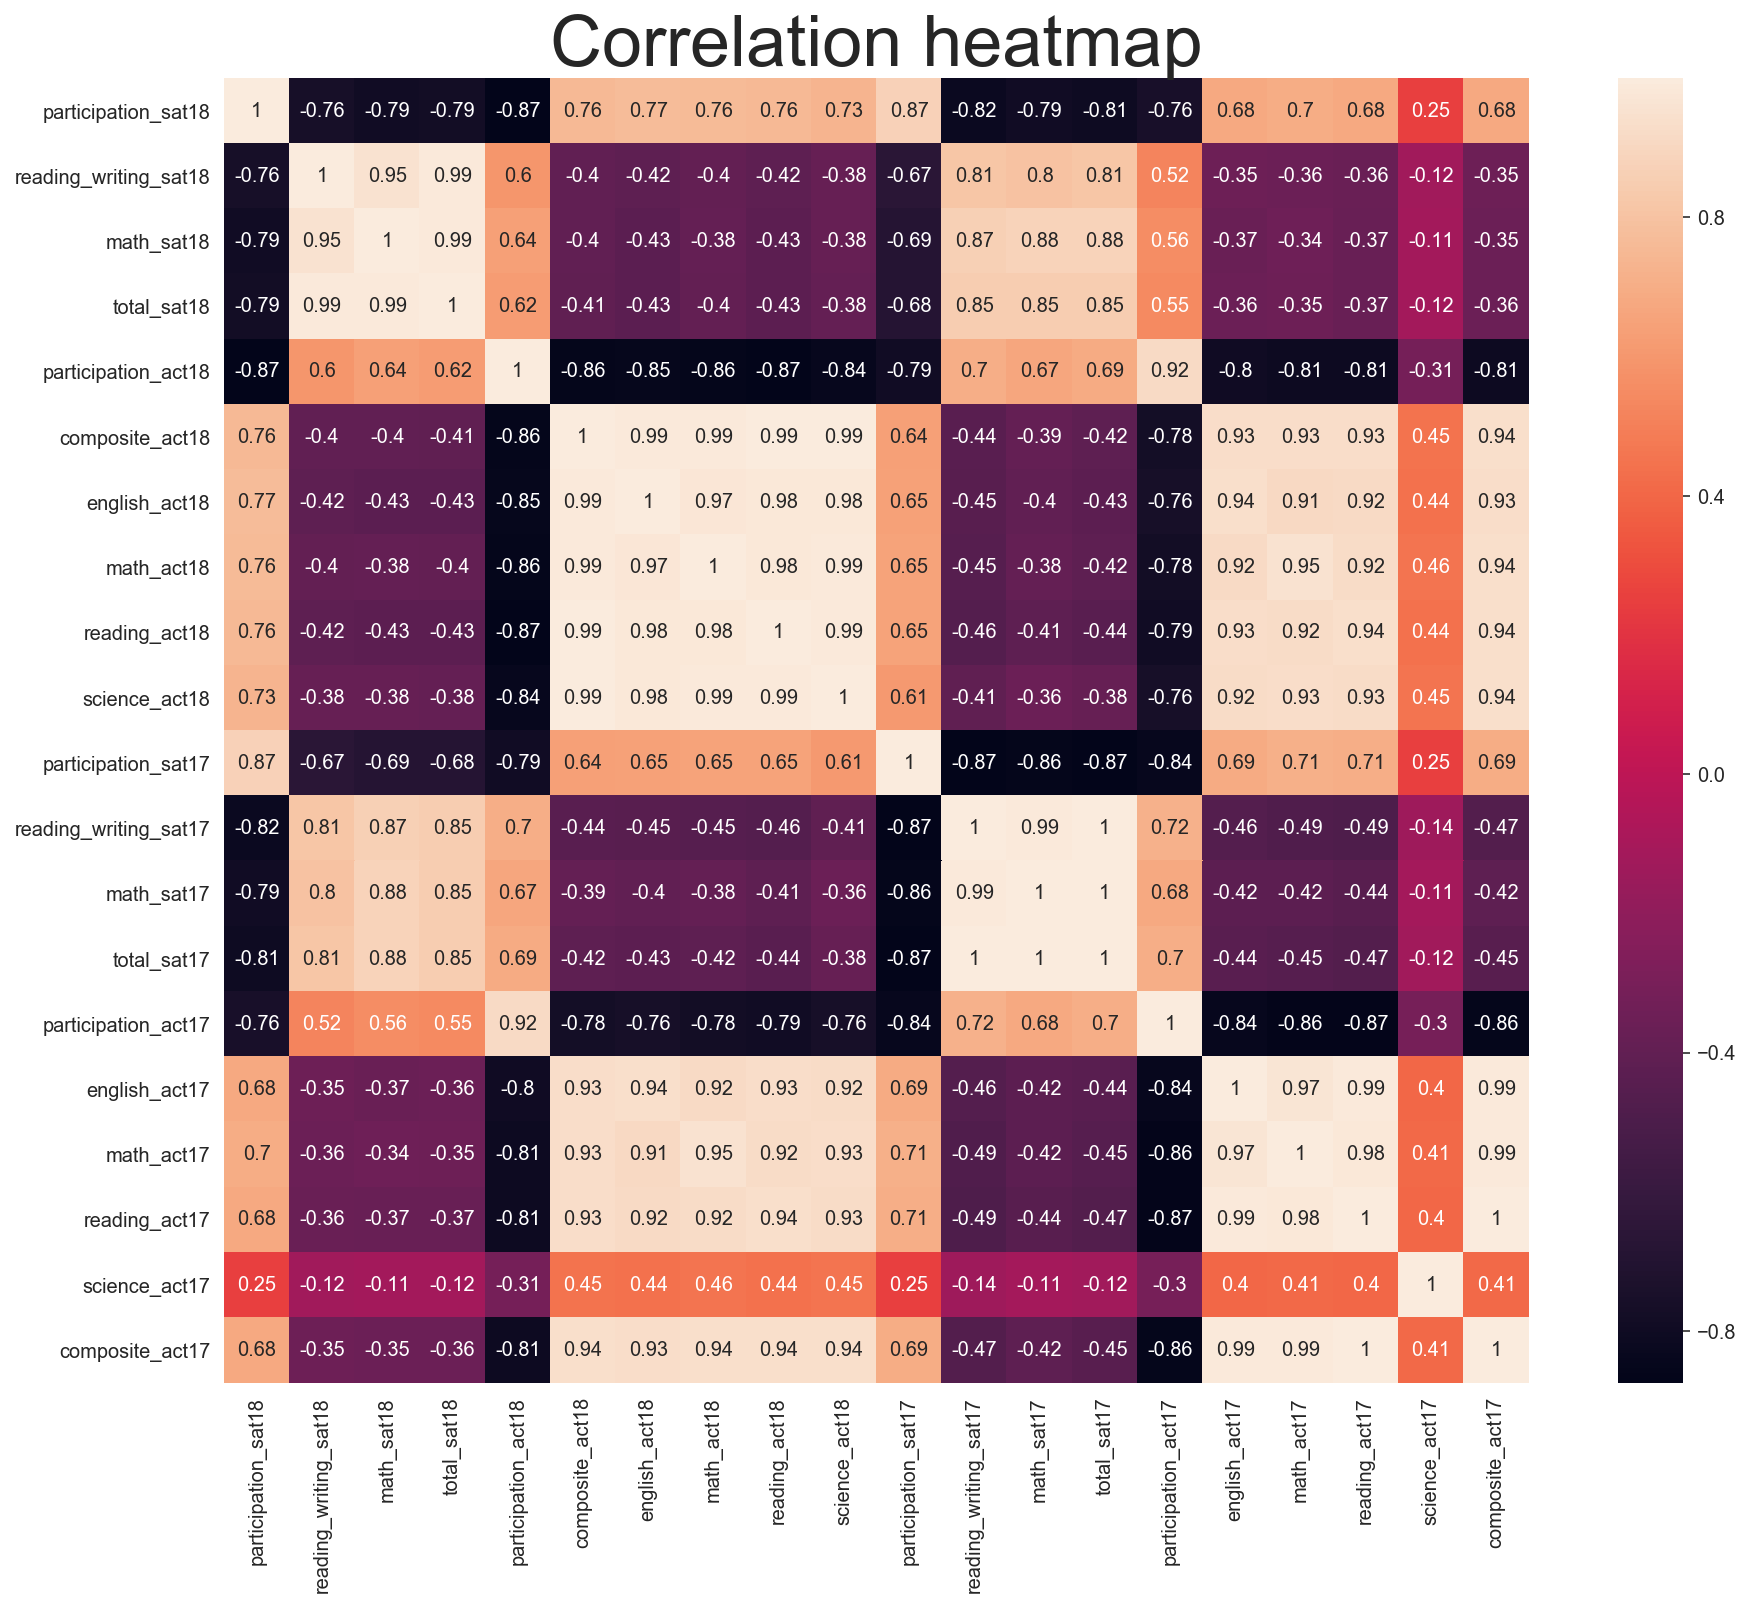

In [102]:
plt.figure(figsize=(16,12))
ax = sns.heatmap(final.corr(),square=True, annot=True)
ax.set_title('Correlation heatmap', fontsize=36)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [162]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,14), sharey=True) # You'll want to specify your figsize
    plt.subplots_adjust(hspace=0.3)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
    for i, title in enumerate(list_of_titles): # Set titles, labels, etc here for each subplot
        ax[i].set_title(title,fontsize=24)
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set_xlabel(xlabel,fontsize=16)
    for i in range(0,len(list_of_columns)):
        ax[i].set_ylabel(list_of_ylabels,fontsize=16)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Participation rates for SAT & ACT

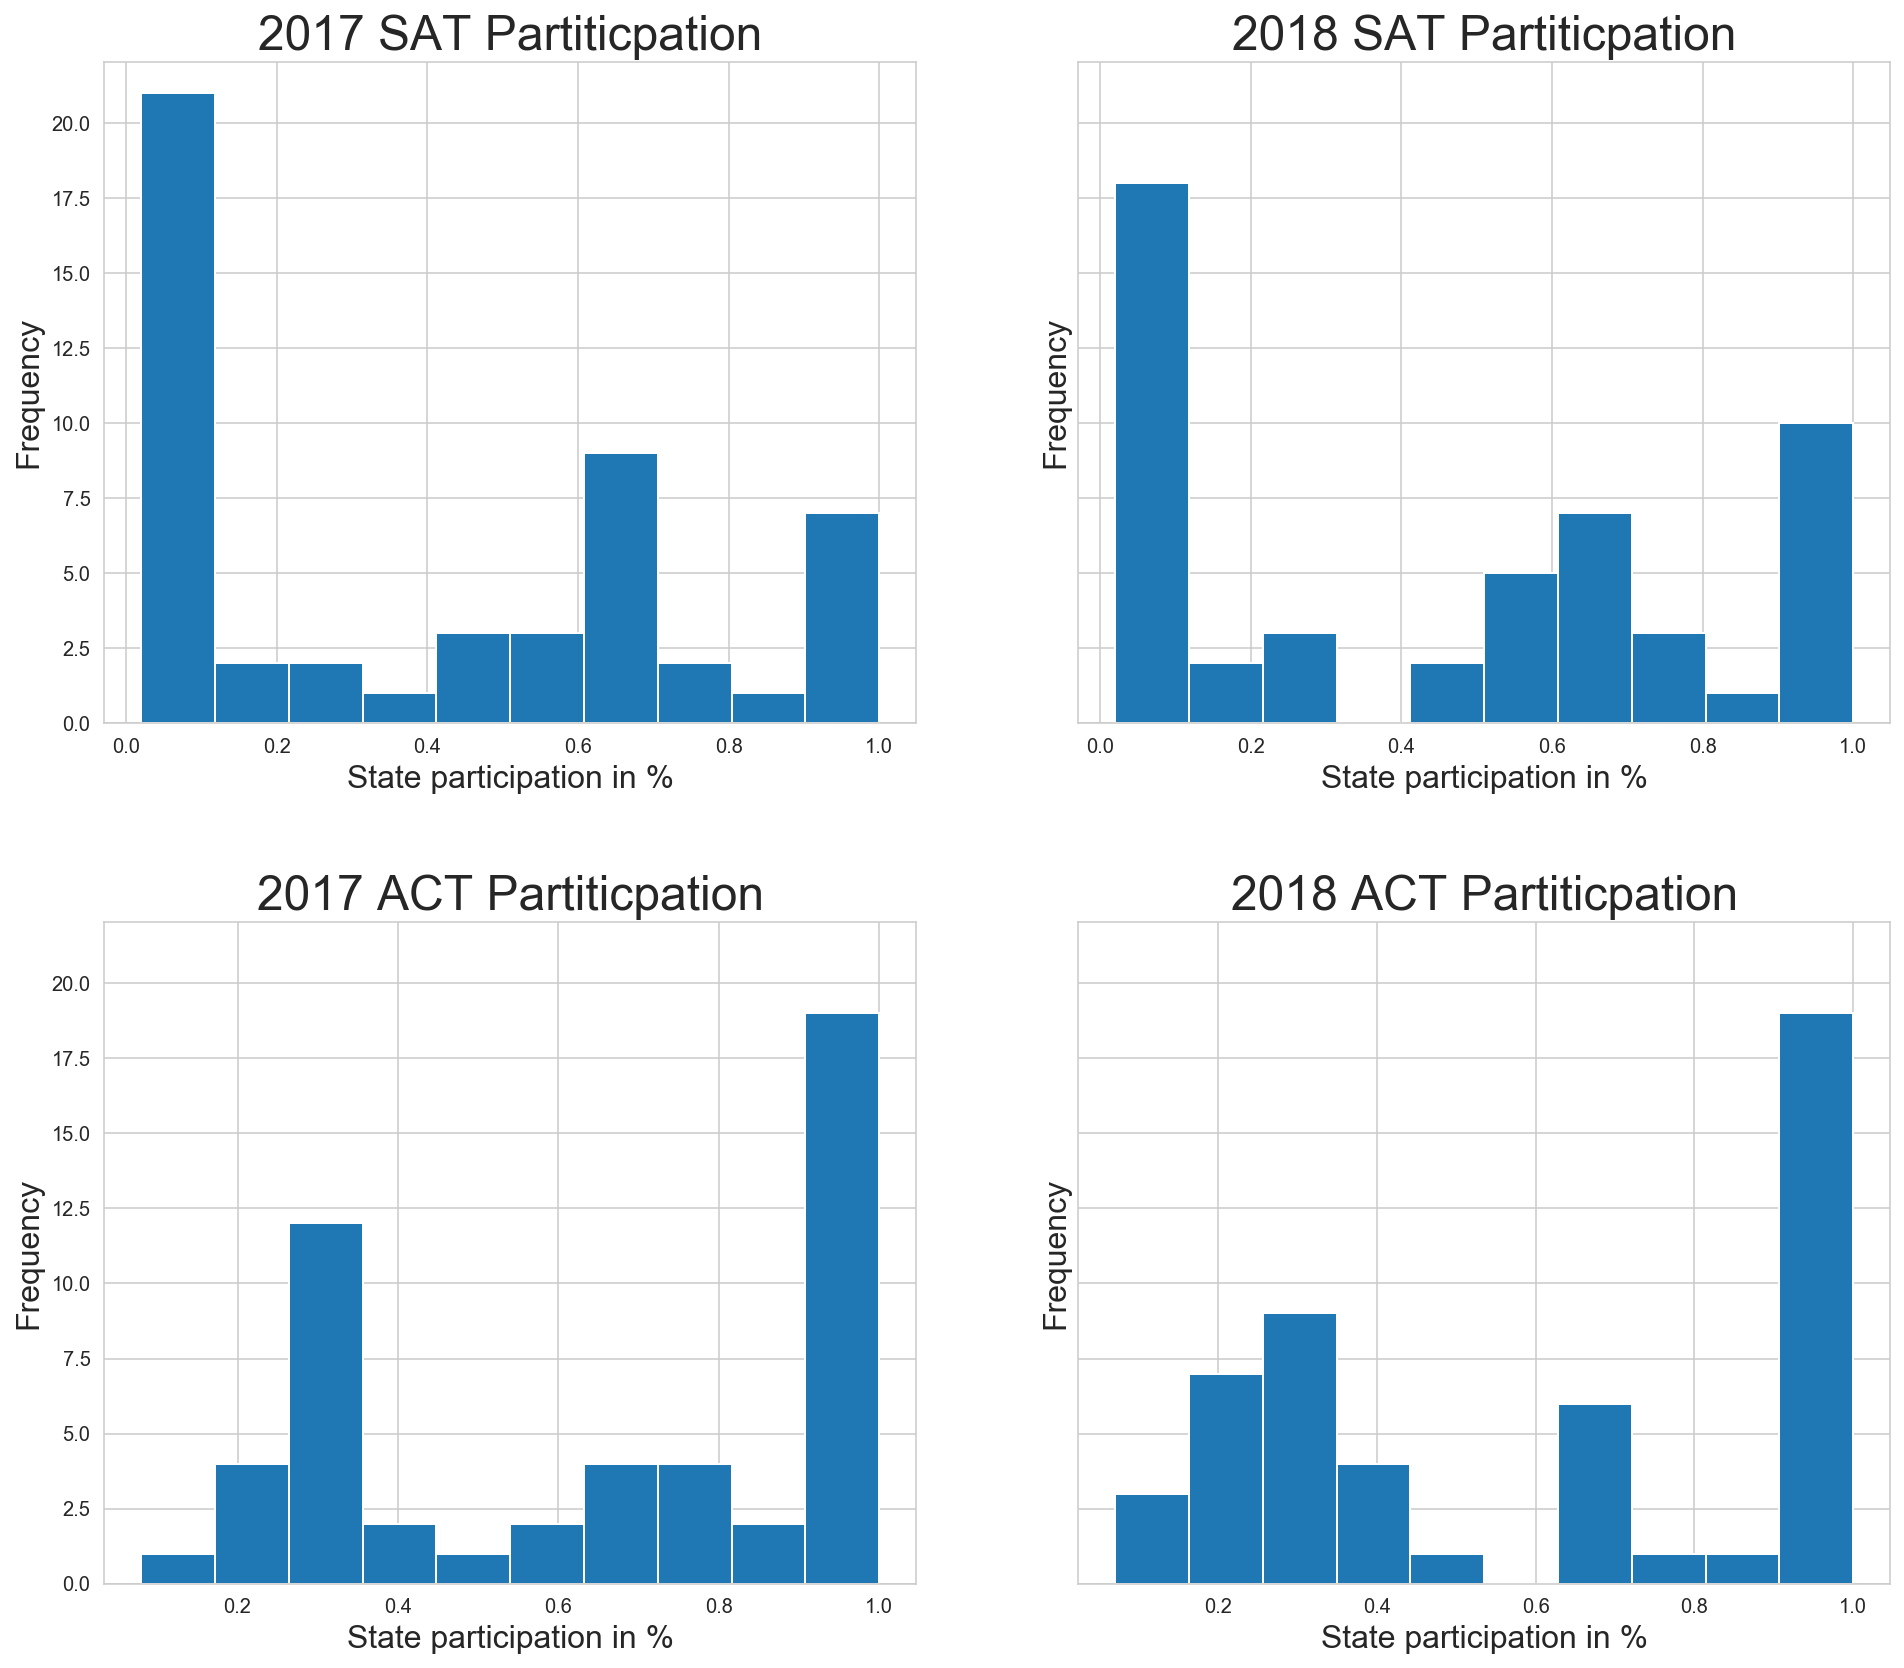

In [168]:
# Code
subplot_histograms(final,['participation_sat17', 'participation_sat18','participation_act17','participation_act18'],
                   ['2017 SAT Partiticpation', '2018 SAT Partiticpation','2017 ACT Partiticpation','2018 ACT Partiticpation'],
                   ['State participation in %','State participation in %','State participation in %','State participation in %'],
                   'Frequency')

- **There are a greater number of states that have 0% participation for SATs than ACTs**
- **Additionally, 100% participation rates for ACTs are higher**
- **Some inverse correlation between SAT and ACT participation rates**

### Math scores for SAT & ACT

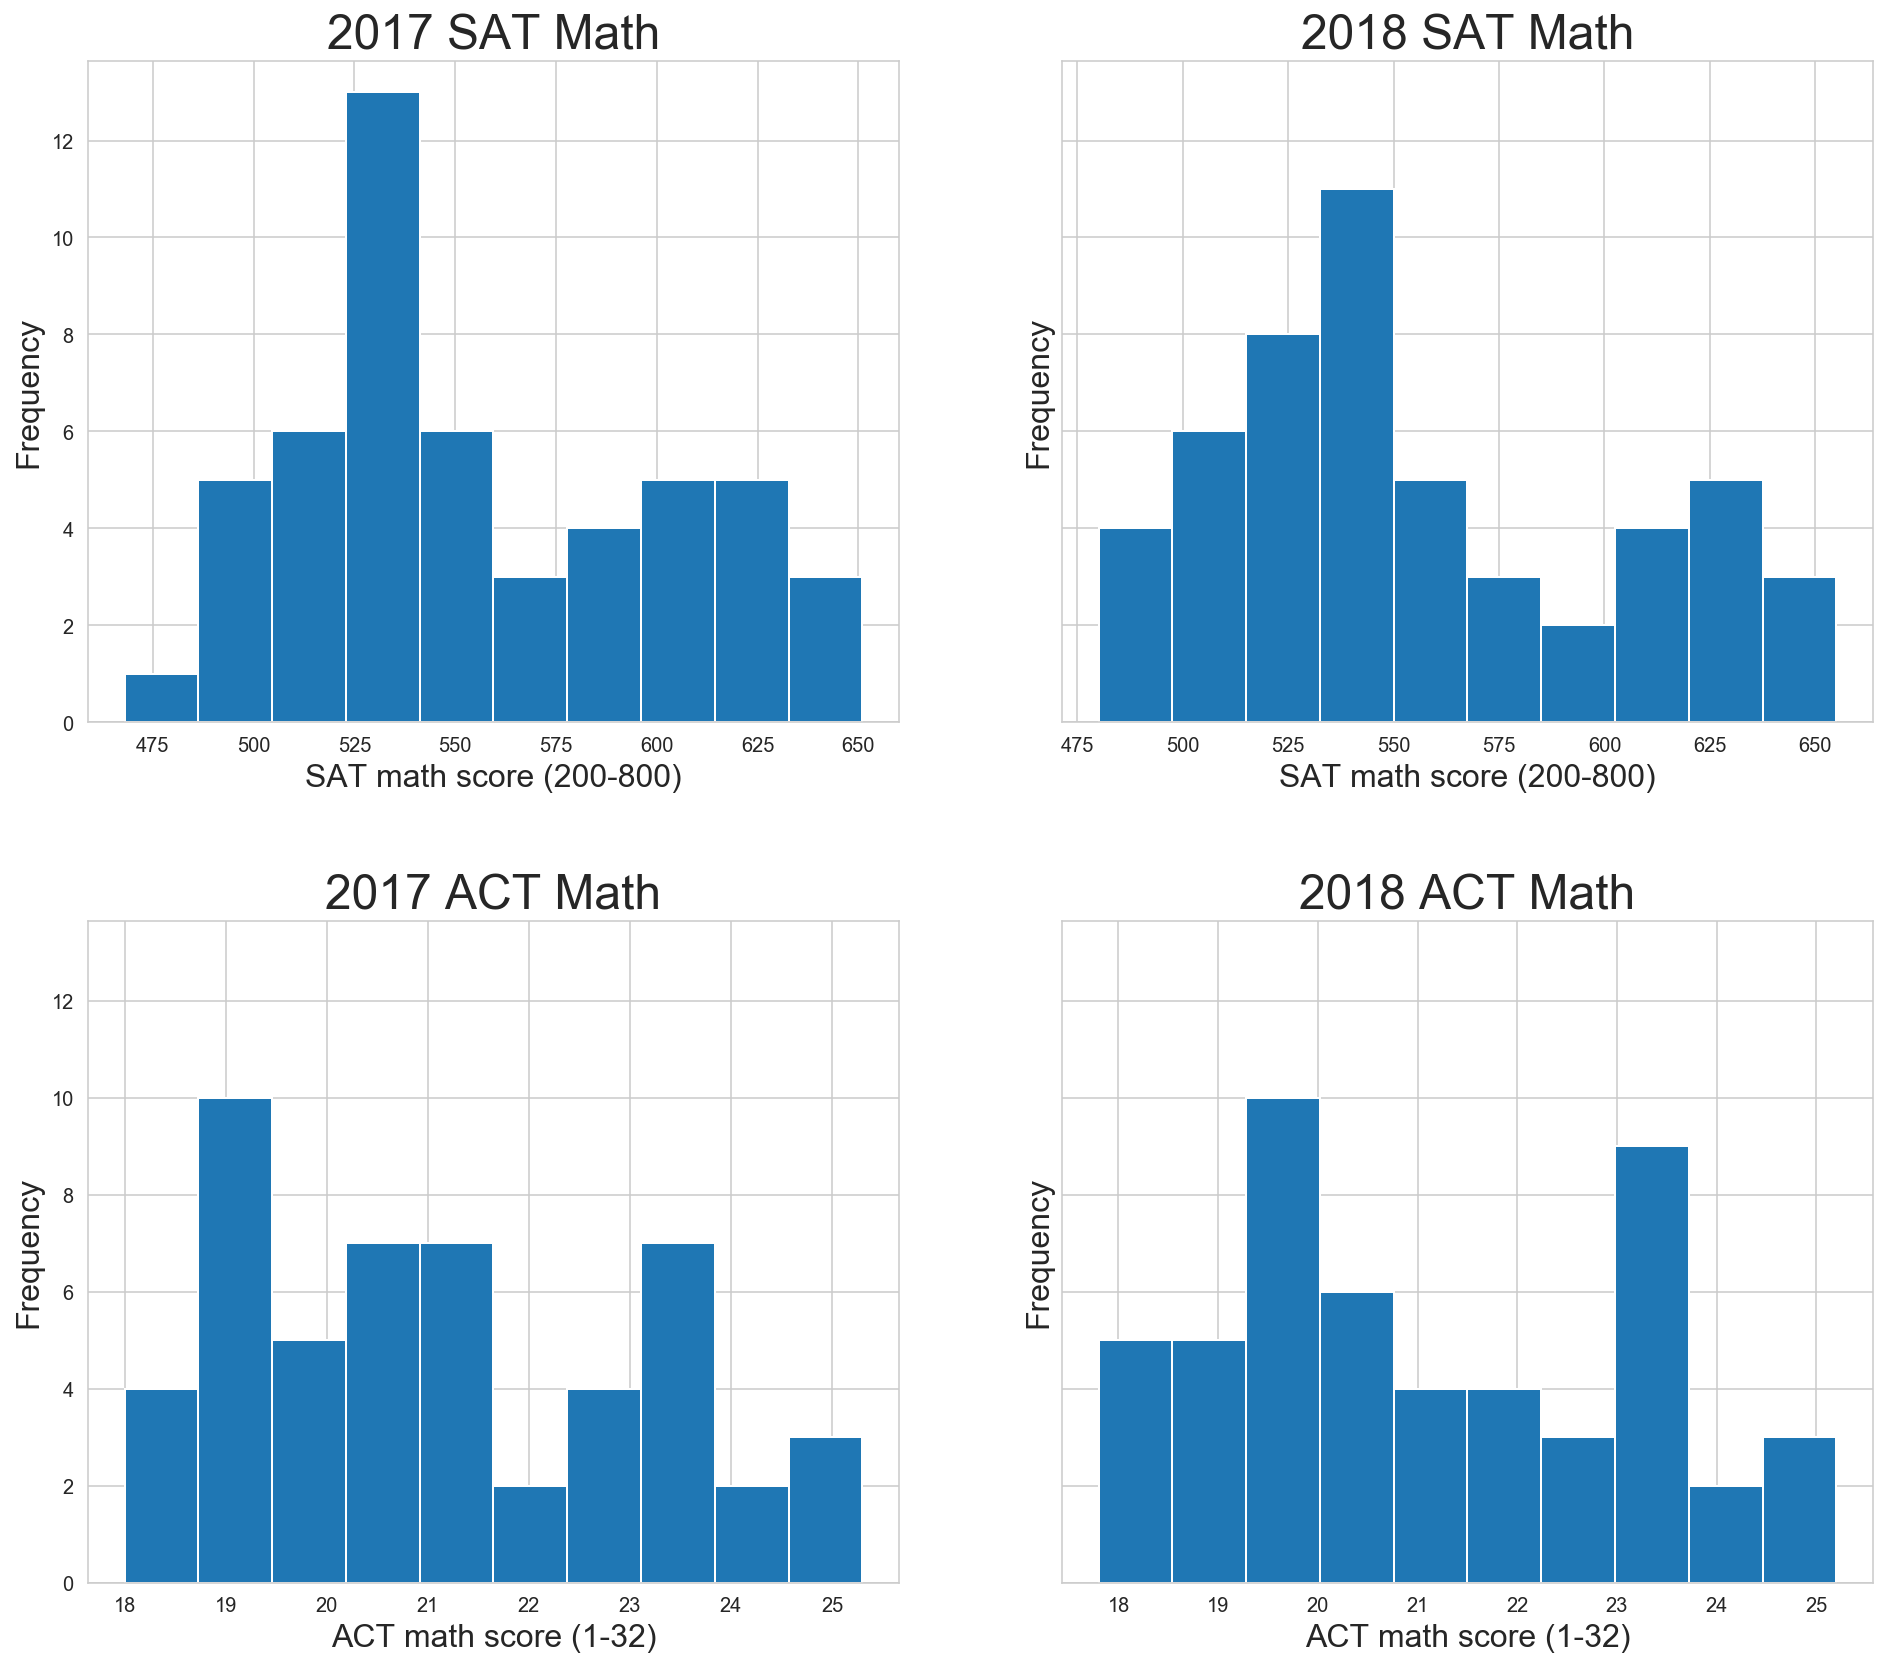

In [169]:
subplot_histograms(final,['math_sat17', 'math_sat18','math_act17','math_act18'],
                   ['2017 SAT Math', '2018 SAT Math','2017 ACT Math','2018 ACT Math'],
                   ['SAT math score (200-800)','SAT math score (200-800)','ACT math score (1-32)','ACT math score (1-32)'],
                   'Frequency')

### Reading/verbal scores for SAT & ACT

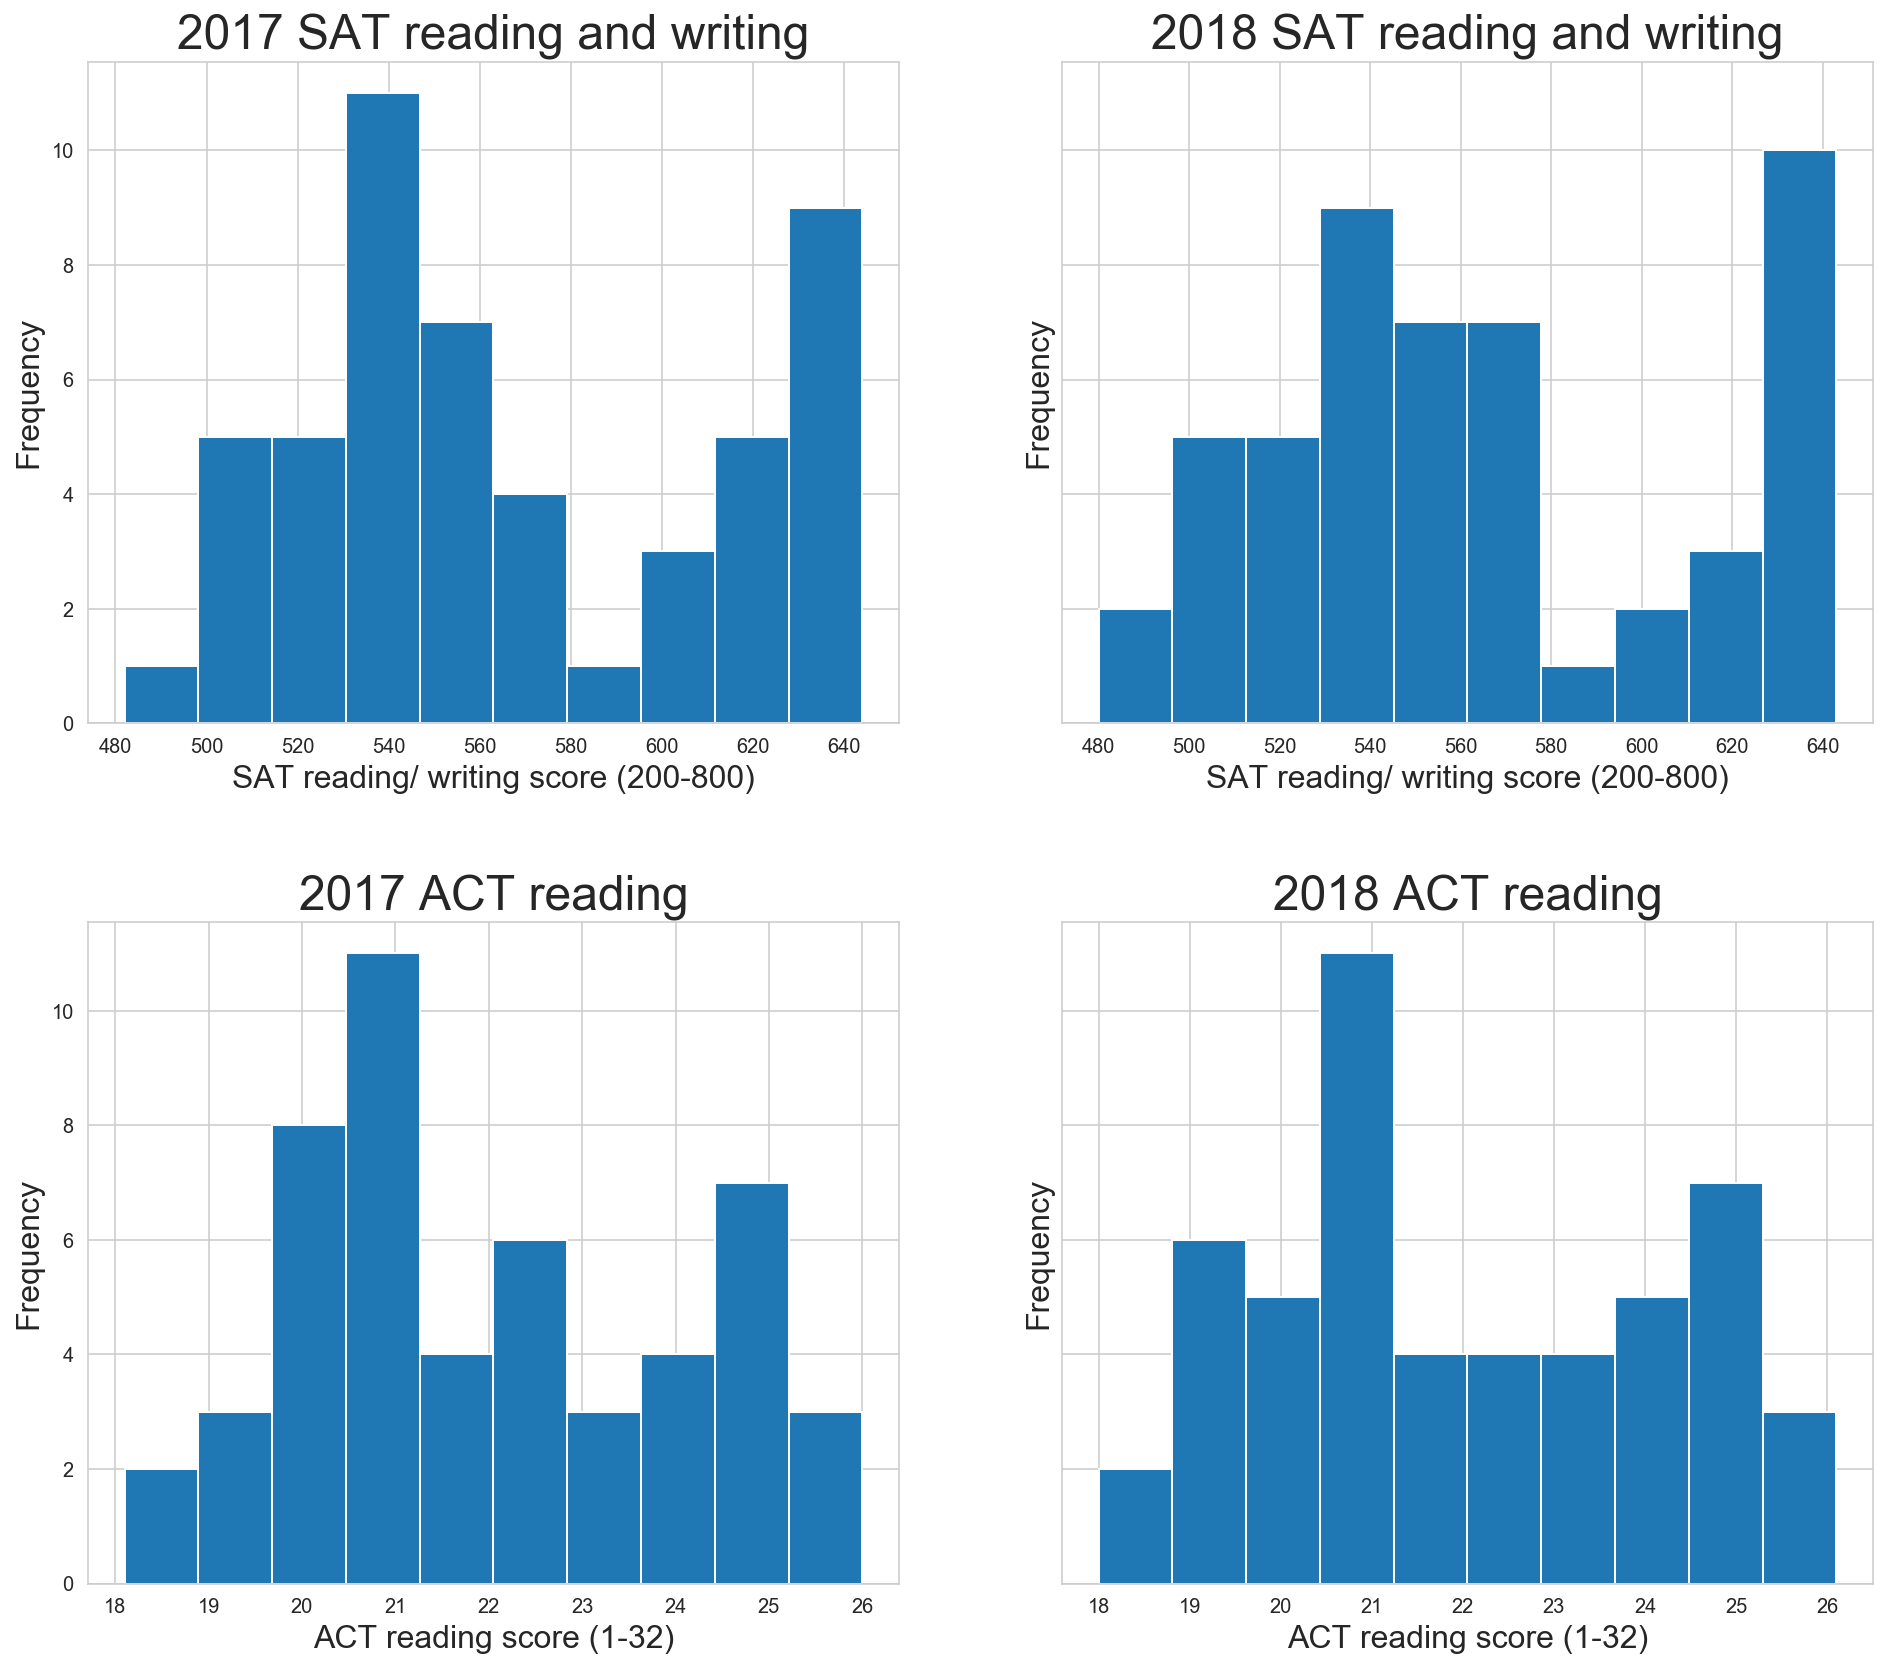

In [170]:
subplot_histograms(final,['reading_writing_sat17', 'reading_writing_sat18','reading_act17','reading_act18'],
                   ['2017 SAT reading and writing', '2018 SAT reading and writing','2017 ACT reading','2018 ACT reading'],
                   ['SAT reading/ writing score (200-800)','SAT reading/ writing score (200-800)','ACT reading score (1-32)',
                    'ACT reading score (1-32)'],
                   'Frequency')

- **Quite similar distriubtion on reading among SAT and ACT results** 
- **2 distinct peaks at (540 and 640) for SATs and (21 and 25) for ACTs**

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [295]:
# Code
def seaborn_scatter(dataframe, xaxis, yaxis, title, xlabel, ylabel):
    sns.lmplot(data=dataframe, x=xaxis, y=yaxis, height=9,aspect=1.45)
    plt.title(title, fontsize=24)
    plt.xlabel(xlabel,fontsize=16)
    plt.ylabel(ylabel,fontsize=16)

### SAT vs. ACT math scores for 2017

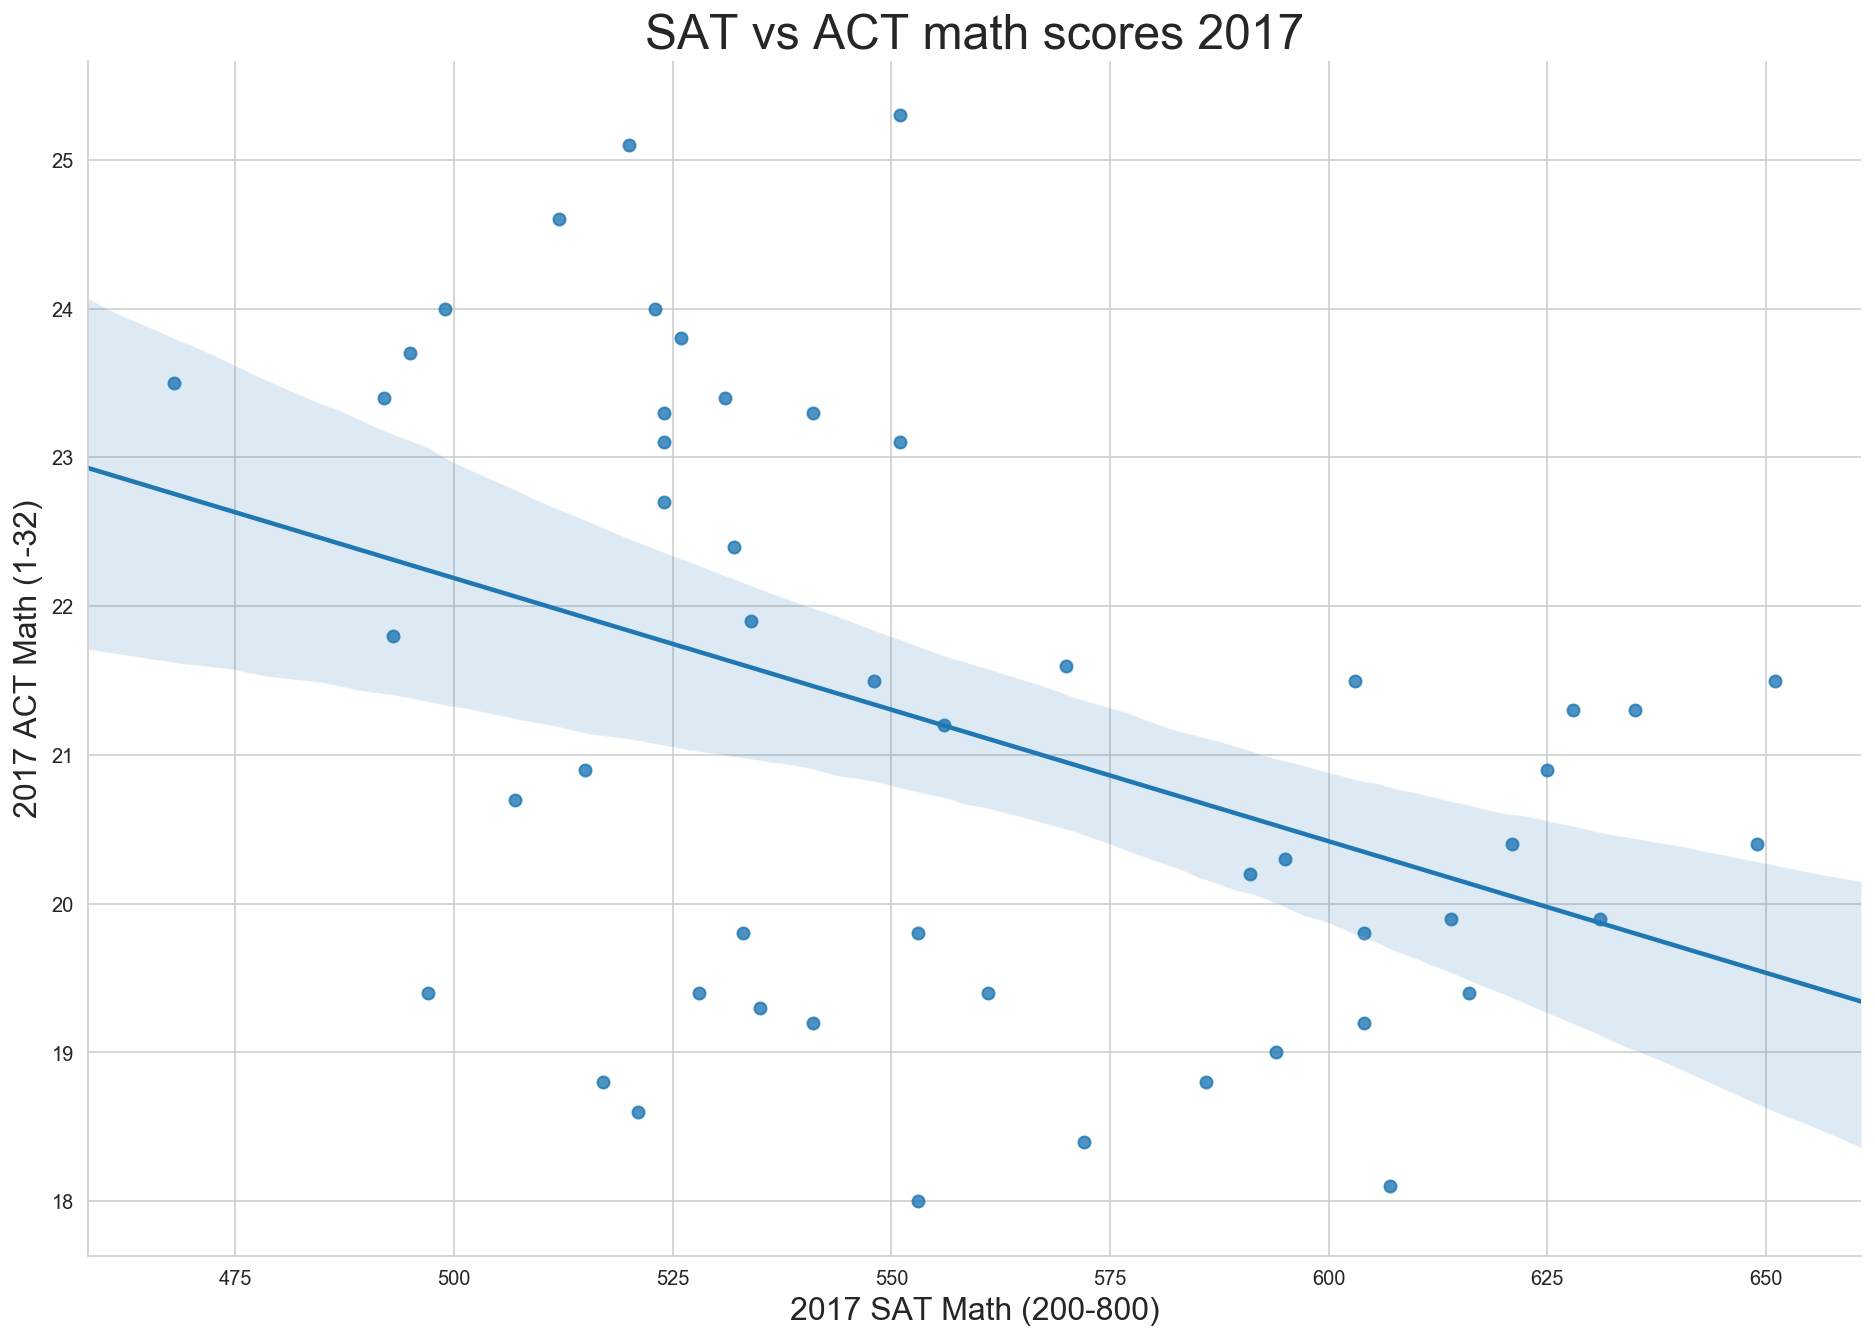

In [296]:
seaborn_scatter(dataframe=final, xaxis='math_sat17', yaxis='math_act17',
                title = 'SAT vs ACT math scores 2017', 
                xlabel = '2017 SAT Math (200-800)', 
                ylabel = '2017 ACT Math (1-32)')

### SAT vs. ACT verbal/reading scores for 2017

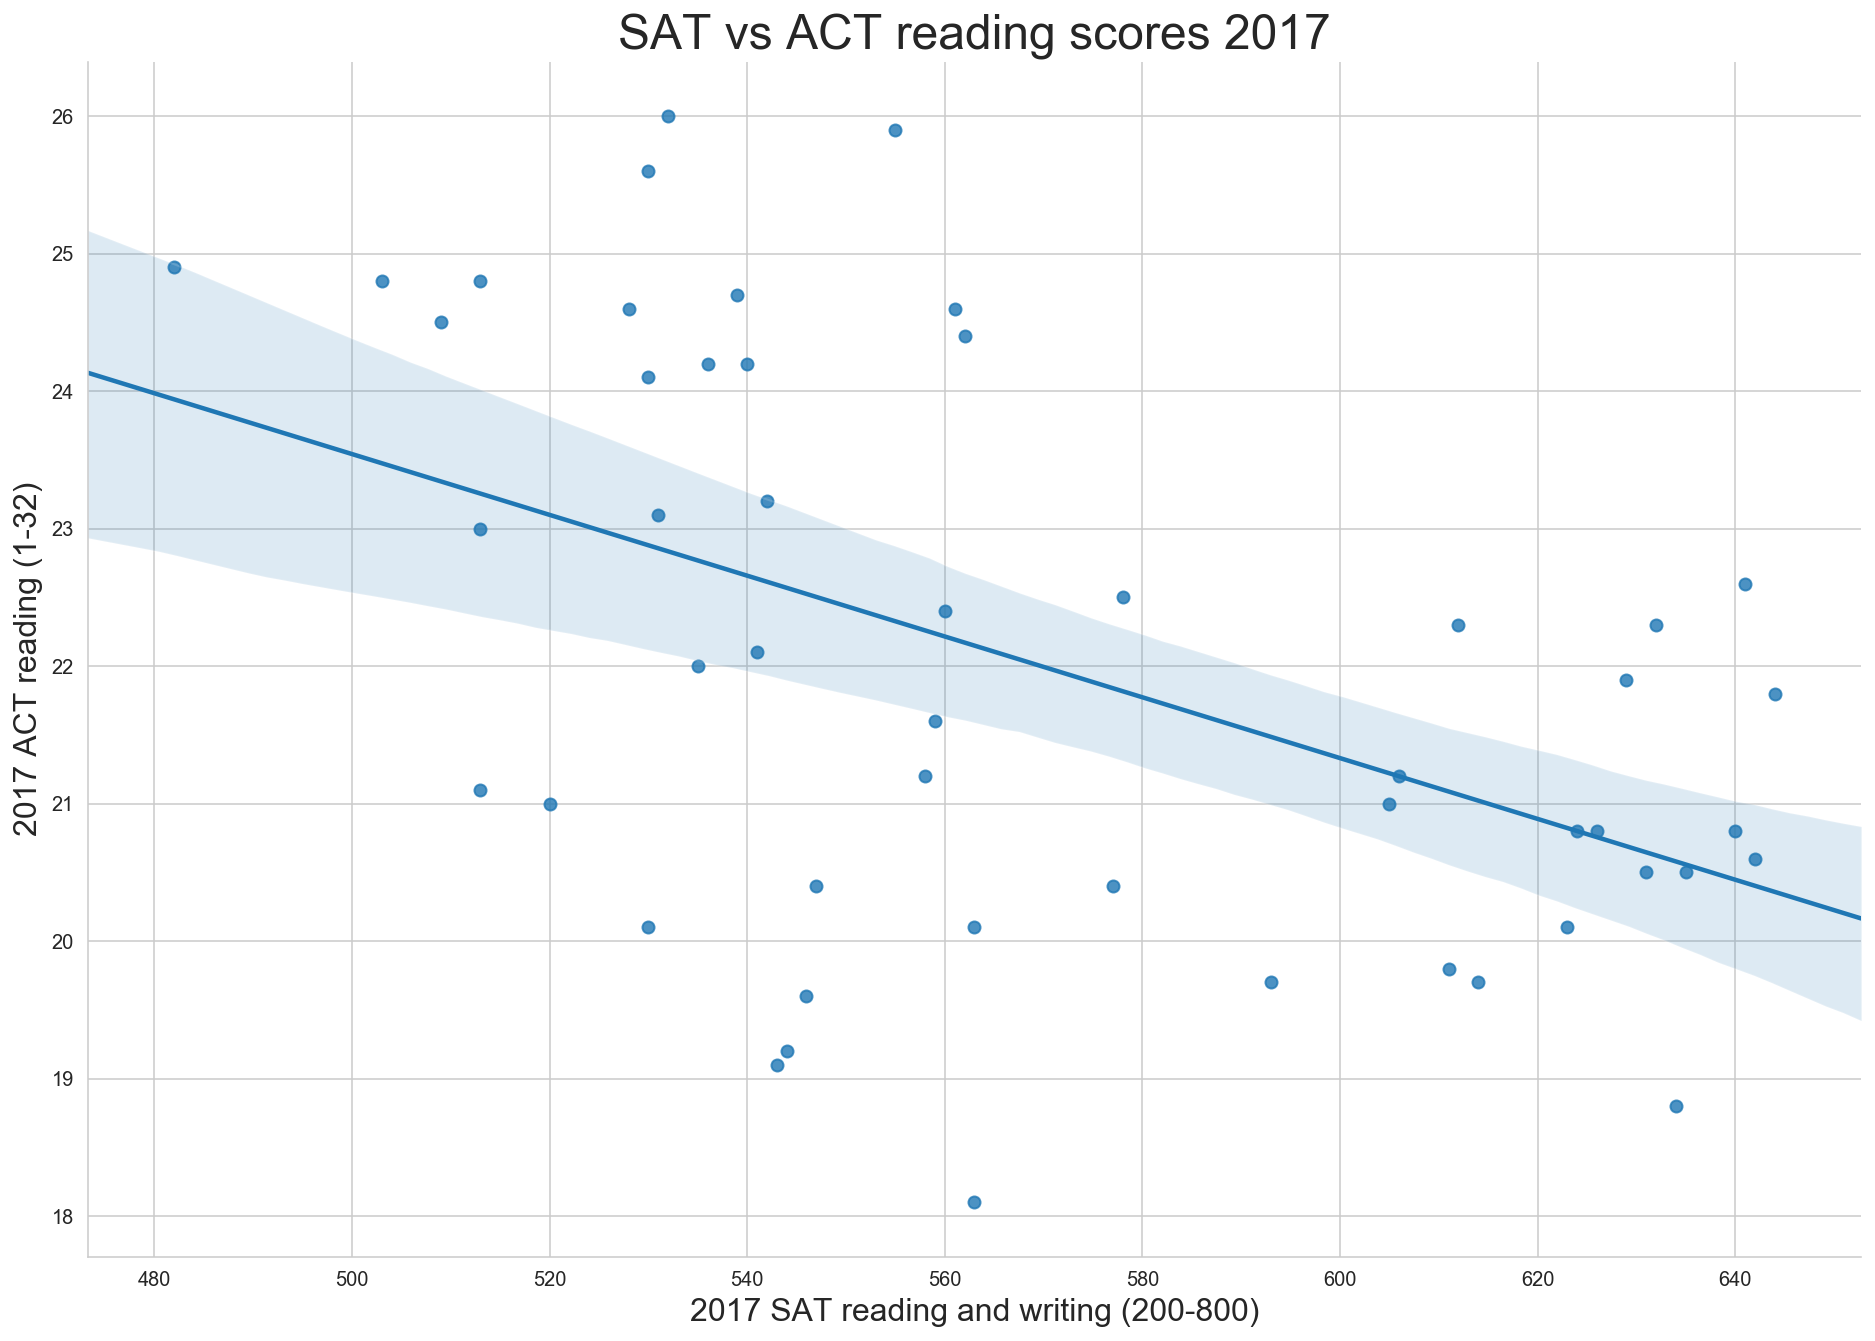

In [297]:
seaborn_scatter(dataframe=final, xaxis='reading_writing_sat17', yaxis='reading_act17',
                title = 'SAT vs ACT reading scores 2017', 
                xlabel = '2017 SAT reading and writing (200-800)', 
                ylabel = '2017 ACT reading (1-32)')

### SAT vs. ACT total/composite scores for 2017

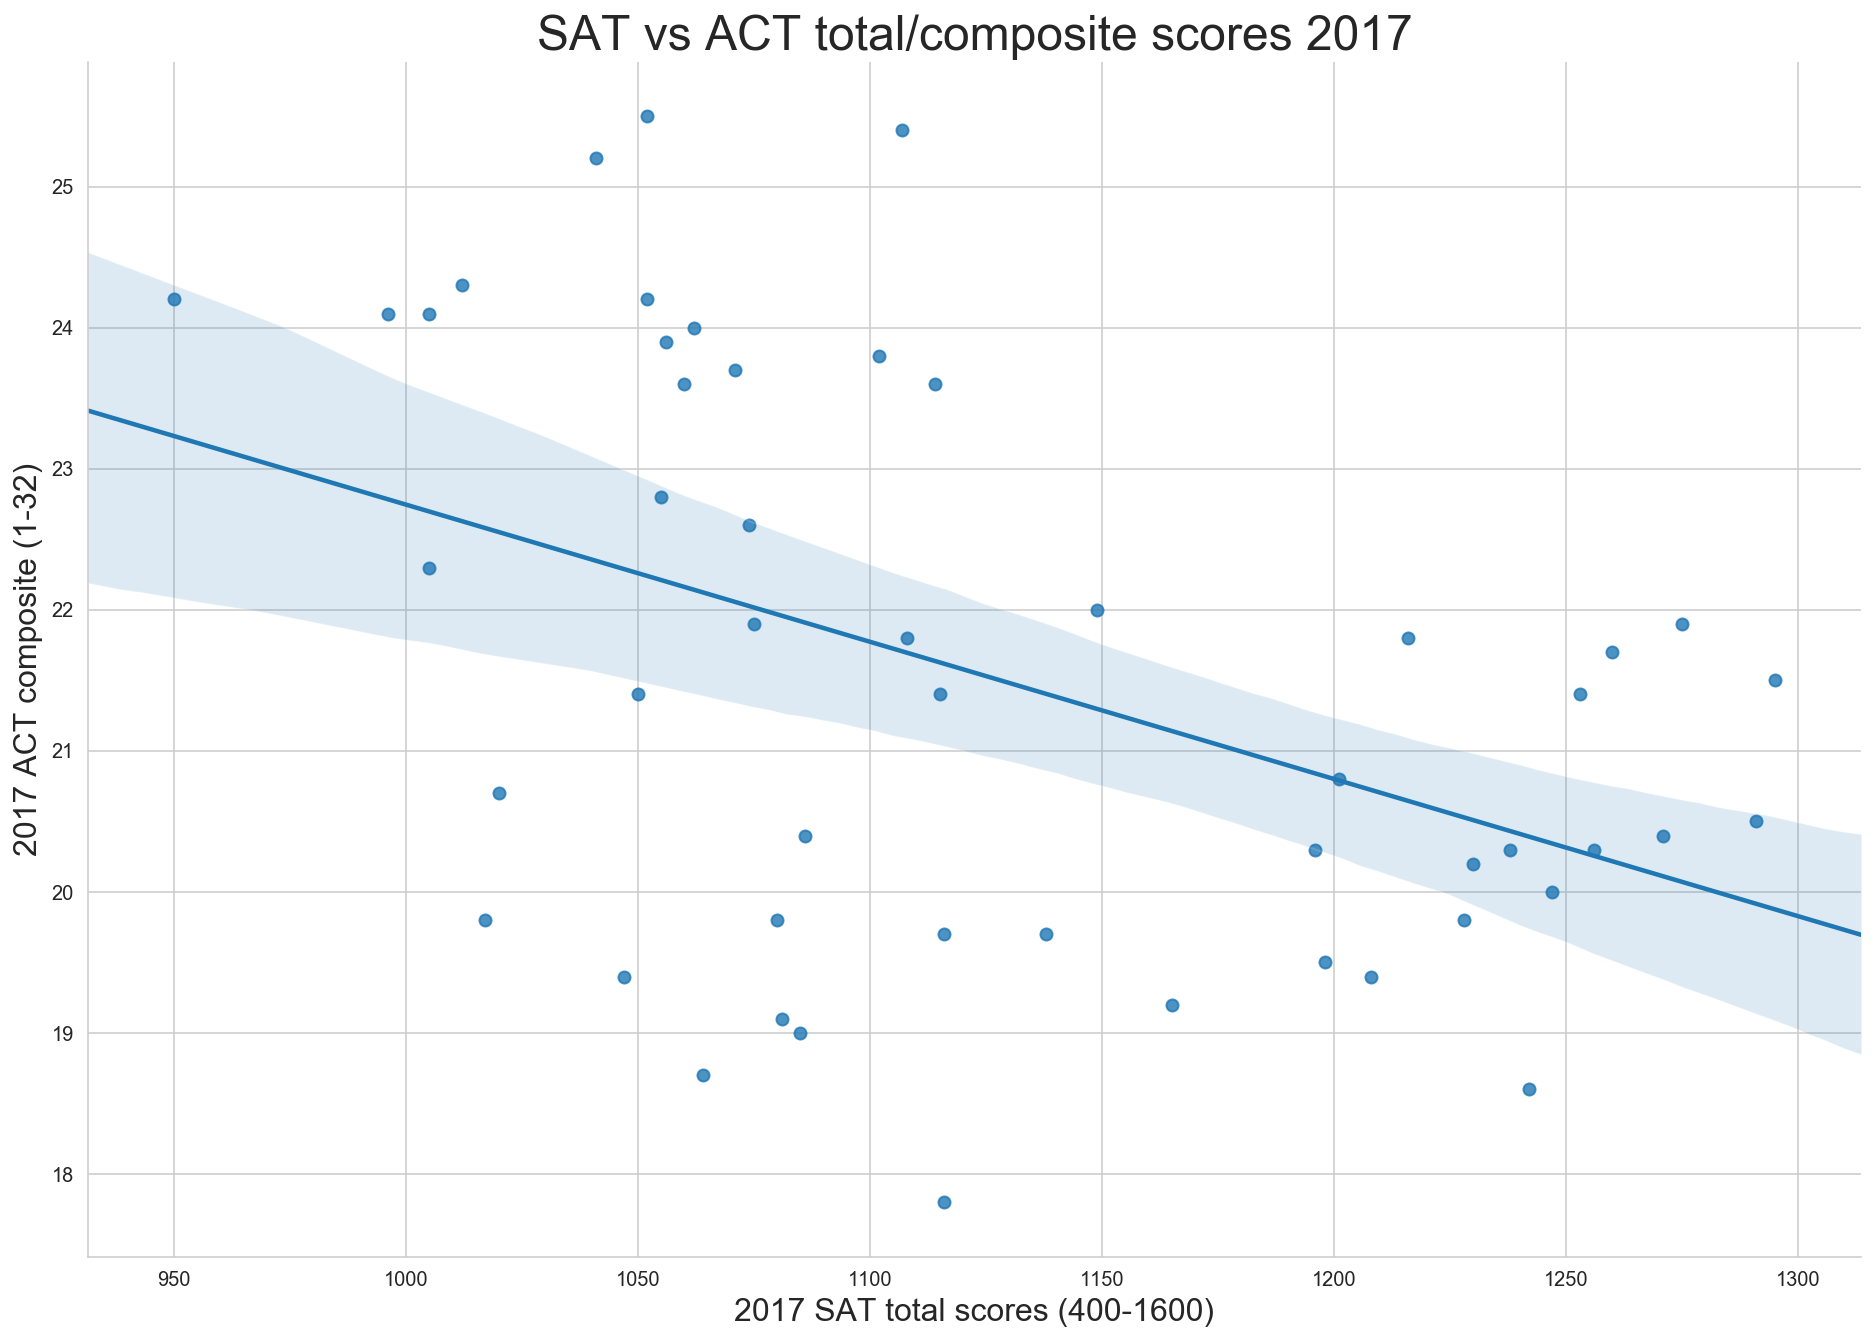

In [298]:
seaborn_scatter(dataframe=final, xaxis='total_sat17', yaxis='composite_act17',
                title = 'SAT vs ACT total/composite scores 2017', 
                xlabel = '2017 SAT total scores (400-1600)', 
                ylabel = '2017 ACT composite (1-32)')

### Total scores for SAT 2017 vs. 2018

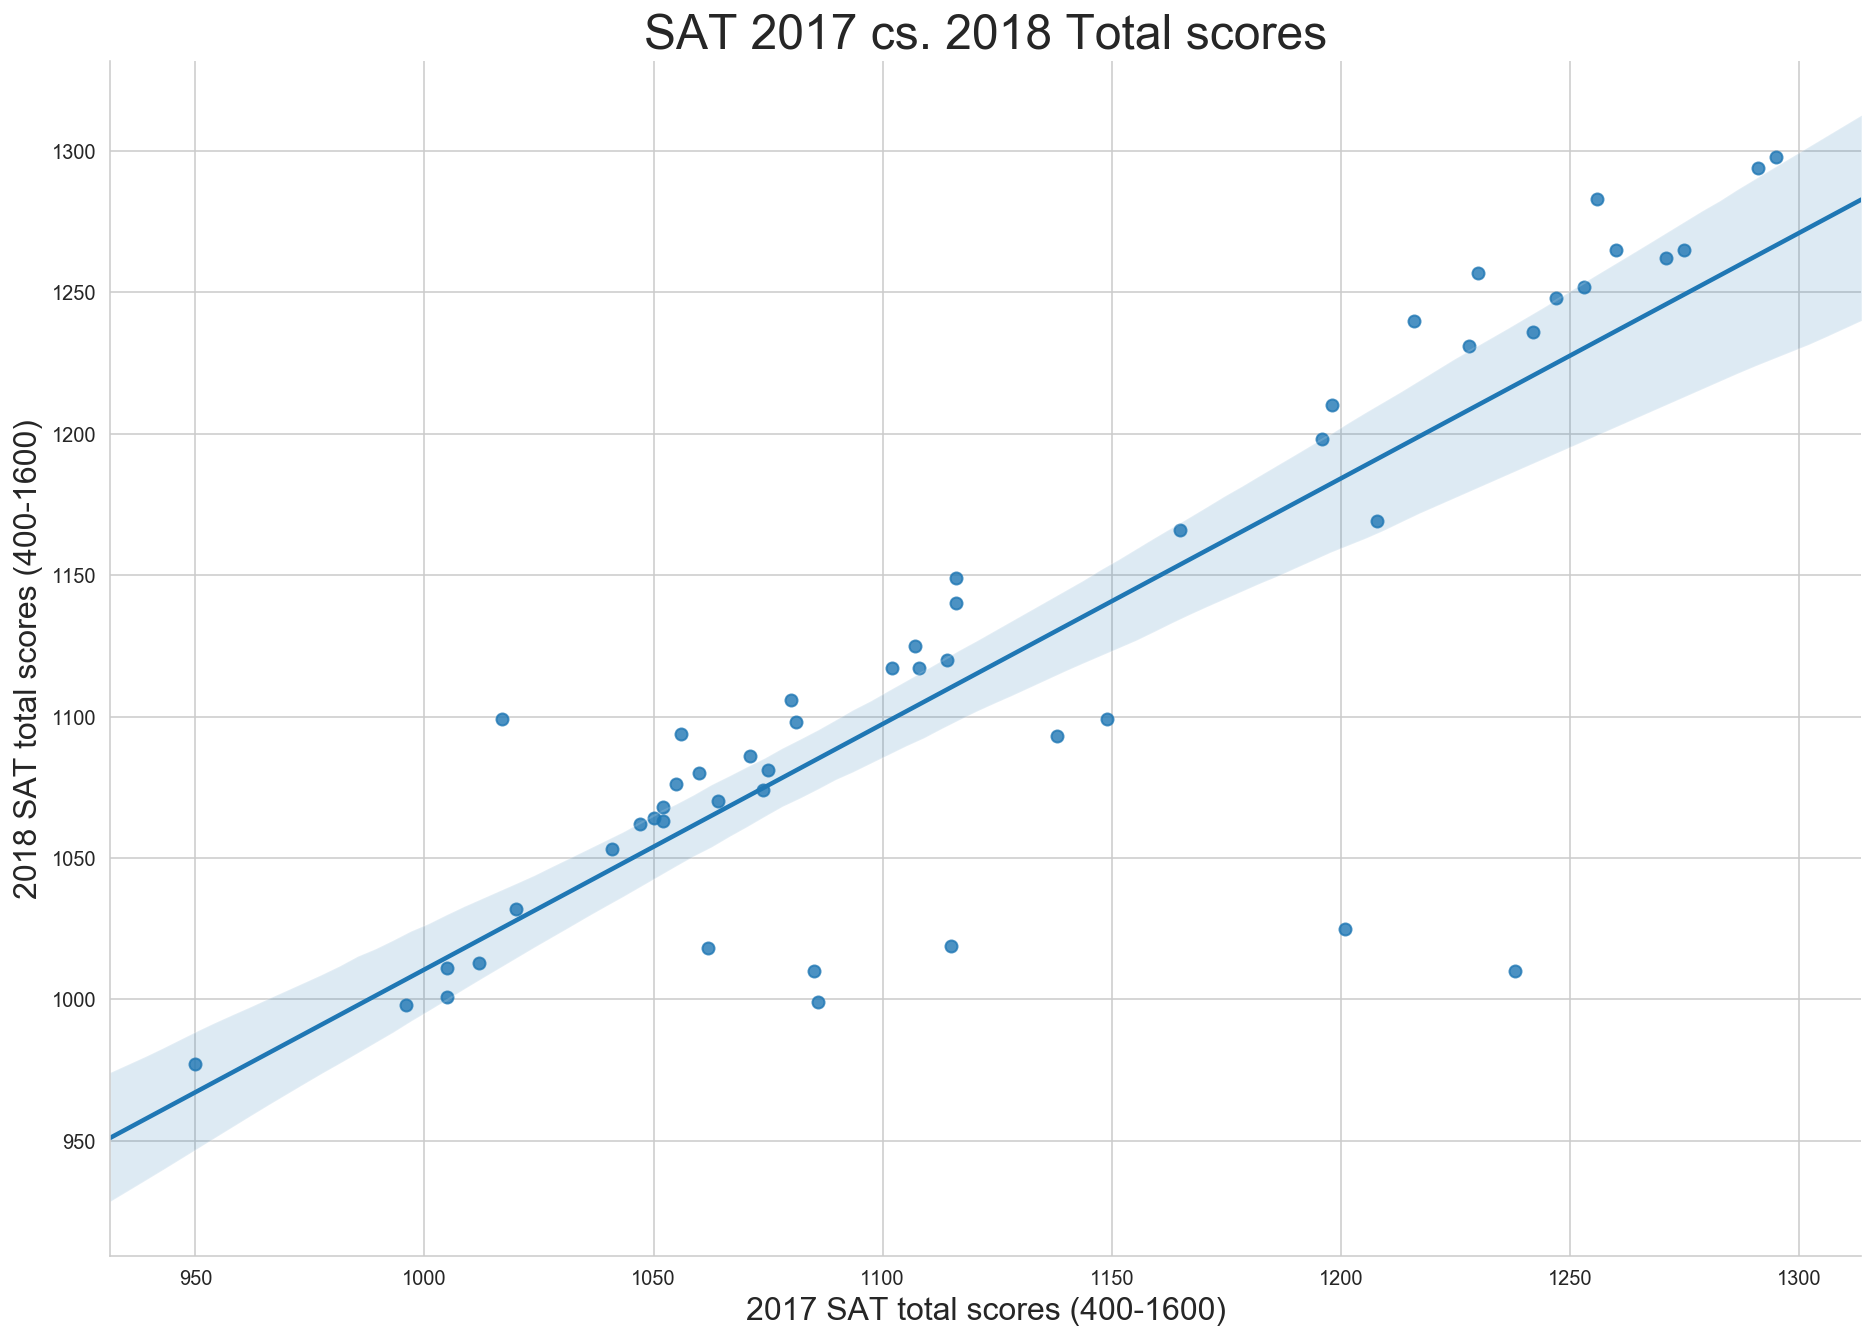

In [299]:
seaborn_scatter(dataframe=final, xaxis='total_sat17', yaxis='total_sat18',
                title = 'SAT 2017 vs. 2018 Total scores', 
                xlabel = '2017 SAT total scores (400-1600)', 
                ylabel = '2018 SAT total scores (400-1600)')

### Composite scores for ACT 2017 vs. 2018

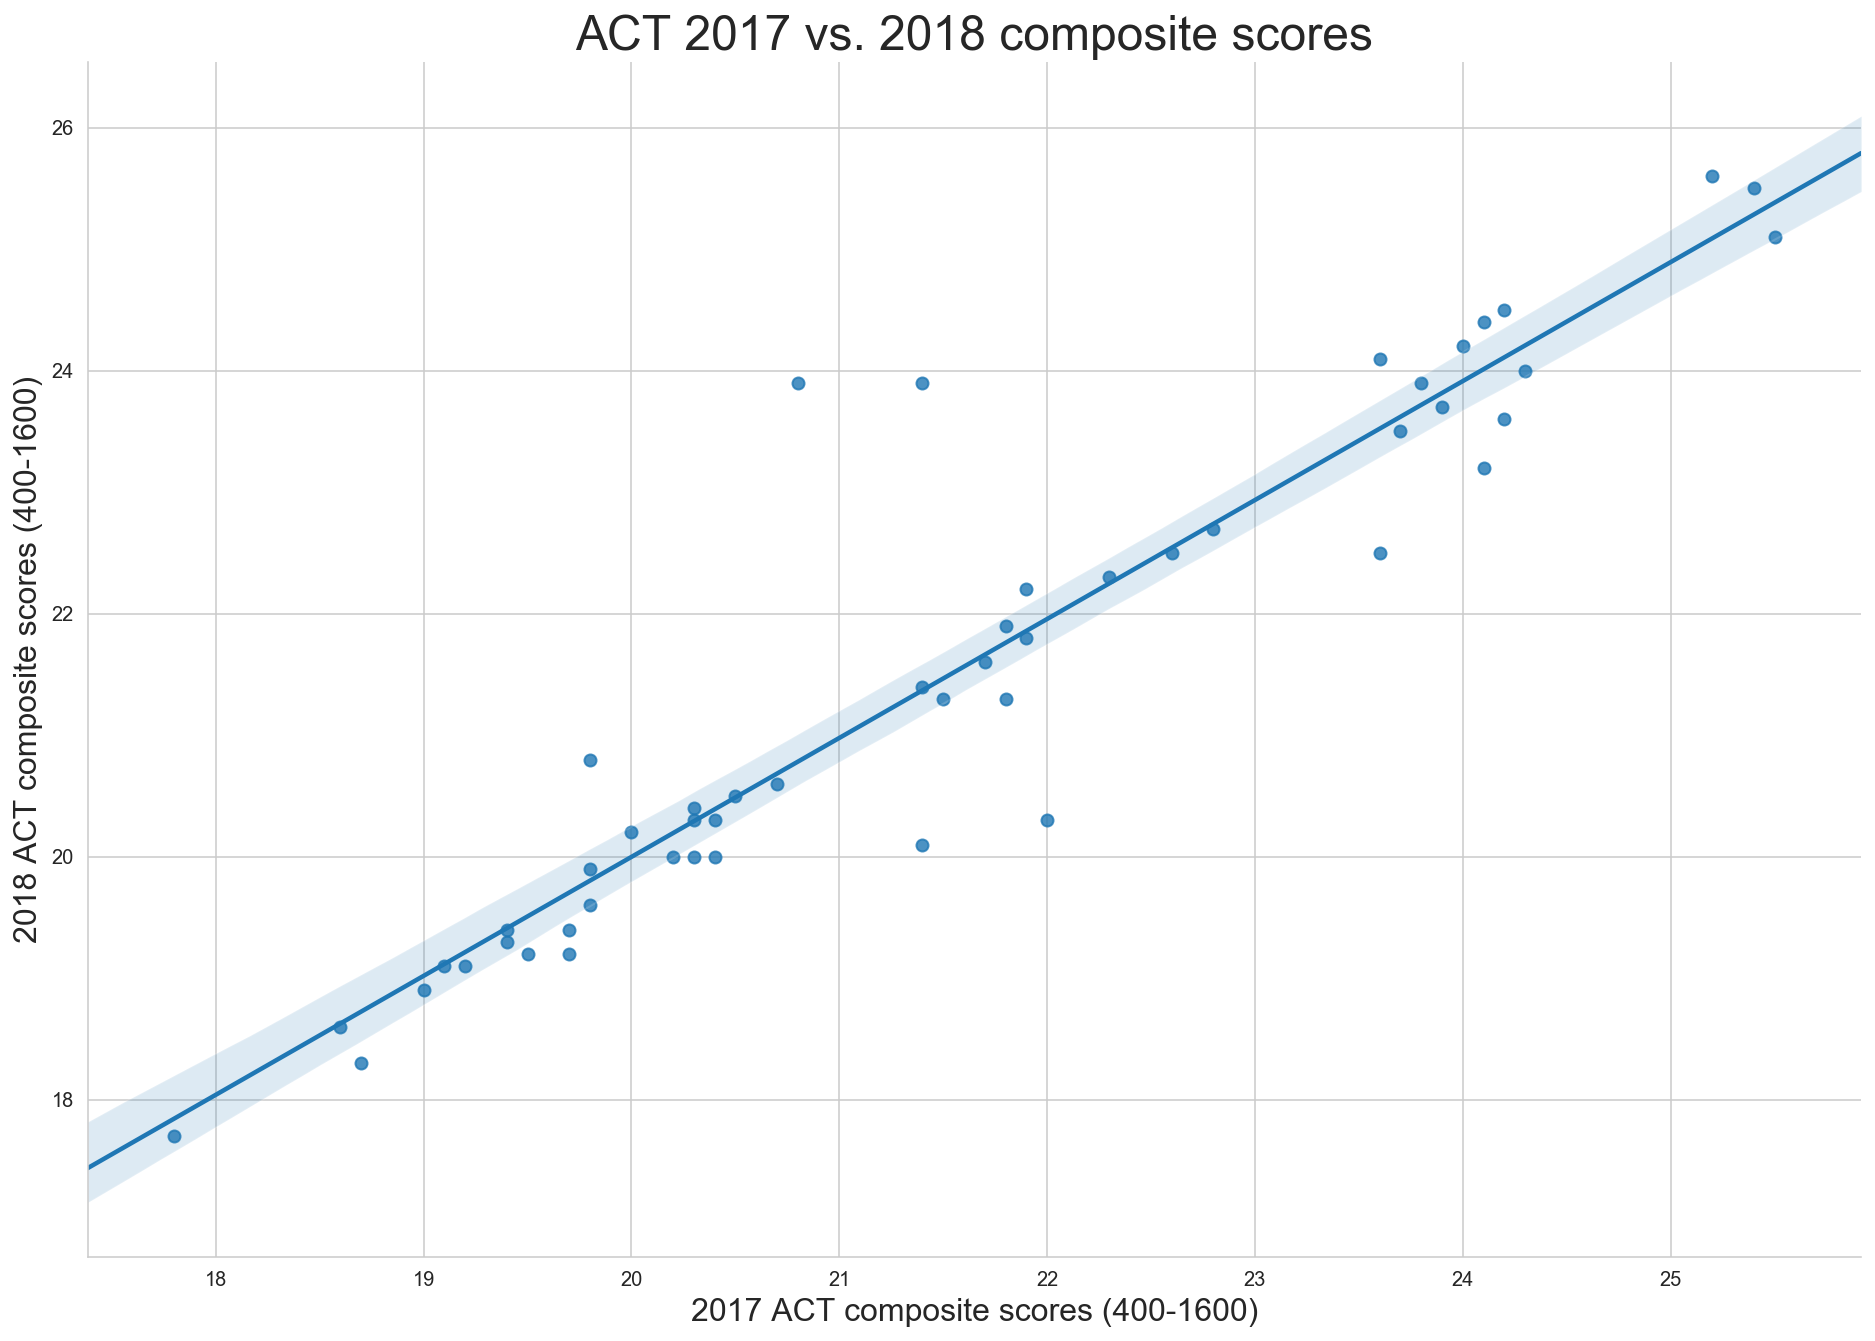

In [300]:
seaborn_scatter(dataframe=final, xaxis='composite_act17', yaxis='composite_act18',
                title = 'ACT 2017 vs. 2018 composite scores', 
                xlabel = '2017 ACT composite scores (400-1600)', 
                ylabel = '2018 ACT composite scores (400-1600)')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

### SAT Scores

In [301]:
### ACT Scores

In [ ]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers: (shape, central tendencies, spread of the distribution)


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?